<a href="https://colab.research.google.com/github/zh-yng/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn # pytorch neural network library
import torch.nn.functional as F

In [2]:
# create Model class that inherits nn.Module
class Model(nn.Module):

  # Input Layer (4 features of flower) -->
  # Hidden Layer1 (x# of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create an instance of model
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# to do charts in Jupyter notebook
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
# pre-processing: change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df

/tmp/ipython-input-939315841.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# set X (features), y (labels) for train_test_split
X = my_df.drop('variety', axis=1) # remove variety column and take remaining dataframe
y = my_df['variety']

In [8]:
# convert to numpy arrays
X = X.values
y = y.values

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# train test split
# random_state should match manual_seed!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to long tensors (64-bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# set criterion of model to measure error (how far off predictions are from data)
criterion = nn.CrossEntropyLoss()

# choose Adam Optimizer
# lr = learning rate (if error doesn't go down after a bunch of epochs, must lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# train our model
# epoch = one run through all training data in our network
epochs = 200
losses = []
for i in range(epochs):
  # go forward & get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure loss/error, will be high at first
  loss = criterion(y_pred, y_train); # predicted vs training y

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation: take the error rate of forward propagation and
  # feed it back through the network to fine-tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165624648332596
Epoch: 80 and loss: 0.08606516569852829
Epoch: 90 and loss: 0.06522615253925323
Epoch: 100 and loss: 0.05286873131990433
Epoch: 110 and loss: 0.04508010298013687
Epoch: 120 and loss: 0.03979312255978584
Epoch: 130 and loss: 0.03596429154276848
Epoch: 140 and loss: 0.03302798792719841
Epoch: 150 and loss: 0.030512521043419838
Epoch: 160 and loss: 0.027733495458960533
Epoch: 170 and loss: 0.024612072855234146
Epoch: 180 and loss: 0.021672405302524567
Epoch: 190 and loss: 0.019319692626595497


Text(0.5, 0, 'Epoch')

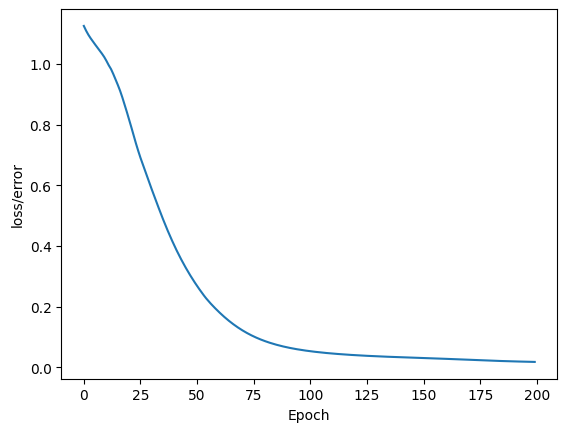

In [15]:
# graph results
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [16]:
# validation: evaluate model on test dataset
with torch.no_grad(): # turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # find loss/error

In [17]:
loss

tensor(0.1775)

In [28]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    elif y_test[i] == 2:
      x = "Virginica"

    # tells us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct.')

1.) tensor([-7.0837,  3.9382,  8.7369]) 	 2 	 2
2.) tensor([-9.8711,  1.7714, 15.9530]) 	 2 	 2
3.) tensor([-10.8324,   3.0169,  16.0902]) 	 2 	 2
4.) tensor([-3.9556,  7.8951, -1.1896]) 	 1 	 1
5.) tensor([-8.9619,  3.6067, 12.2663]) 	 2 	 2
6.) tensor([-2.1213,  8.5257, -5.1761]) 	 1 	 1
7.) tensor([-6.8943,  4.9857,  7.1661]) 	 2 	 2
8.) tensor([-3.8532,  8.0699, -1.5694]) 	 1 	 1
9.) tensor([-7.9053,  4.2998,  9.6757]) 	 2 	 2
10.) tensor([-10.5532,   1.8380,  17.0212]) 	 2 	 2
11.) tensor([-6.5110,  5.1470,  6.3427]) 	 2 	 2
12.) tensor([ 11.4623,   1.4096, -20.3331]) 	 0 	 0
13.) tensor([ 10.5285,   1.2517, -18.4669]) 	 0 	 0
14.) tensor([-0.5117,  6.7448, -5.8111]) 	 1 	 1
15.) tensor([  9.2710,   2.4325, -17.7526]) 	 0 	 0
16.) tensor([-6.0441,  5.7622,  4.8409]) 	 2 	 1
17.) tensor([ 10.3119,   1.5842, -18.5383]) 	 0 	 0
18.) tensor([-6.8873,  4.3156,  7.9690]) 	 1 	 2
19.) tensor([ 12.2259,   1.0172, -21.1442]) 	 0 	 0
20.) tensor([  8.8682,   1.9641, -16.4609]) 	 0 	 0
21.) 

In [33]:
# evaluate new data on the network
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [34]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.2166,   1.2279, -19.6496])


In [35]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [36]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.2602,  3.9032,  9.0829])


In [37]:
# save our nn model's weights and biases
torch.save(model.state_dict(), 'my_iris_model.pt')

In [38]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [39]:
# ensure it was loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)